ch5. 1~5 pg. 290~318 (pg303~310 제외)

## Chapter 5 회귀

## 01 회귀 소개

- 갈톤은 사람의 키가 평균 키로 회귀하려는 경향을 가진다는 자연의 법칙이 있다는 것을 발견하면서 유래됨.

- 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내기


- **단일 회귀**: 독립변수 1개

  **다중 회귀**: 독립 변수 여러개

- **선형 회귀**: 회귀 계수의 결합이 선형

  **비선형 회귀**: 회귀 계수의 결합이 비선형


- Classification (분류): 예측값이 Category값 (이산값)

  Regression (회귀): 예측값이 숫자 (연속형)



### 선형 회귀 모델

- **일반 선형 회귀**: 예측값과 실제값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제(Regularization)를 적용하지 않는 모델

- **Ridge (릿지)**: 선형 회귀에 L2 규제를 추가한 회귀 모델. L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델

- **Lasso(라쏘)**: 선형 회귀에 L1 규제를 적용한 방식. L1규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것. 이러한 특성으로 L1 규제는 피처 선택 기능으로도 불림.

- **ElasticNet(엘라스틱넷)**: L2, L1 규제를 함께 결합한 모델. 주로 피처가 많은 데이터 세트에서 적용되며, L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정함.

- **Logistic Regression (로지스틱 회귀)**: 분류에 사용되는 선형 모델. 일반적으로 이진 분류뿐만 아니라 희소 영역의 분류 (ex. 텍스트 분류)에서 뛰어난 예측 성능을 보이는 강력한 분류 알고리즘

## 02 단순 선형 회귀를 통한 회귀 이해

최적의 회귀 모델 - 잔차의 합(RSS)이 최소가 되는 모델



```
RSS(w0, w1) = 1/N * Σ(yi-(w0+w1*xi))^2 
```



## 03 비용 최소화하기 - 경사 하강법 (Gradient Descent) 소개

**경사 하강법**: 점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식

- W 파라미터의 개수에 따라 매우 복잡해지는 고차원 방정식을 푸는 것보다 훠린 더 직관적이고 빠르게 비용 함수가 최소가 되는 W 파라미터 값을 구할 수 있음.

- 반복적으로 비용 함수의 반환 값, 즉 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 W 파라미터를 지속해서 보정해 나감. 오류 값이 더 이상 작아지지 않으면 그 오류 값을 최소 비용으로 판단하고 W값을 최적 파라미터로 반환

- 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트하기 떄문에 수행 시간이 매우 오래 걸림. 실전에서는 대부분 확률적 경사 하강법을 이용. 

- 확률적 경사 하강법(Stochastic Gradient Descent): 전체 입력 데이터로 w가 업데이트되는 값을 계산하는 것이 아니라 일부 데이터만 이용해 w가 업데이트되는 값을 계산하므로 경사 하강법에 비해서 속도가 빠름. 



---



Step 1. w1, w0를 임의의 값으로 설정하고 첫 비용 함수의 값을 계산

Step 2. w1을 w1+η(학습률)*2/N * Σxi*(실제값i-예측값i), w0을 wo+η*2/N * Σ(실제값i-예측값i)으로 업데이트 후 다시 비용 함수의 값을 계산

Step 3. 비용 함수의 값이 감소했으면 다시 Step2를 반복. 더 이상 비용 함수의 값이 감소하지 않으면 그때의 w1, w0을 구하고 반복을 중지함.

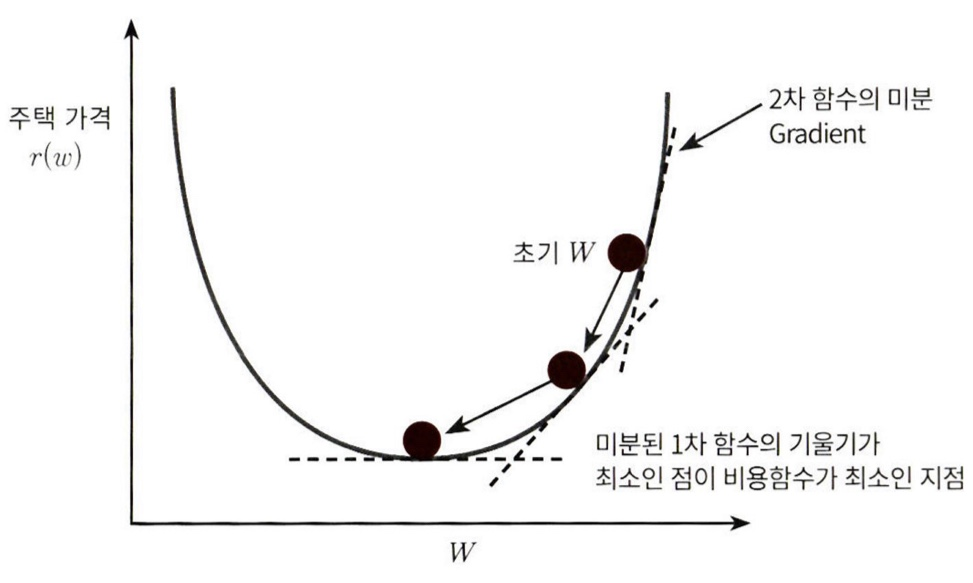

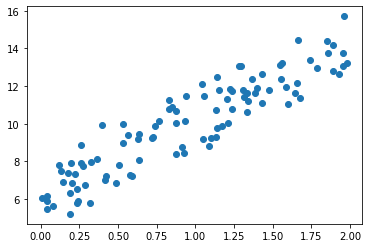

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# y = 4X+6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2*np.random.rand(100,1) # np.random.rand(m,n): 0~1의 균일분포 표준정규분포 난수를 m*n 행렬로 생성
y = 6 + 4*X + np.random.randn(100,1) # np.random.randn(m,n): 평균 0, 표준편차 1인 가우시안 표준정규분포 난수를 m*n 행렬로 생성

# X,y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

In [2]:
# 비용 함수 정의

def get_cost(y,y_pred):
  N=len(y)
  cost = np.sum(np.square(y-y_pred))/N # Σ(실제값i-예측값i)^2 / N
  return cost

In [3]:
# w1과 w0를 업데이트 할 w1_update, w0_update를 반환
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
  N=len(y)
  # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
  w1_update = np.zeros_like(w1) 
  w0_update = np.zeros_like(w0)
  # 예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred = np.dot(X,w1.T) + w0 # 예측값 = w0 + X1*w1 + X2*w1 + ... + X100*w1
  diff = y - y_pred

  # w0_update를 dot행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors = np.ones((N,1))

  # w1과 w0을 업데이트할 w1_update와 w0_update 계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update

In [4]:
# 입력 인자 iters로 주어진 횟수만 경사 하강 방식으로 반복적으로 w1과 w0를 업데이트 적용하는 함수 생성
def gradient_descent_steps(X,y,iters=10000):
  # w0과 w1을 모두 0으로 초기화
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))

  # 인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1,w0,X,y,learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [5]:
def get_cost(y,y_pred):
  N=len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

w1, w0 = gradient_descent_steps(X,y,iters=1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0],w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

# y = 4X+6 과 유사하게 w1, w0값 도출, 예측 오류 비용은 약 0.9935

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


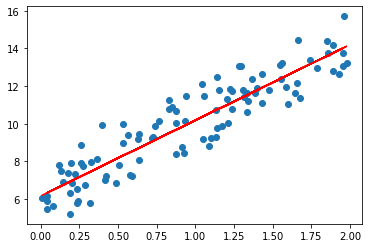

In [6]:
# 회귀선 표시
plt.scatter(X,y)
plt.plot(X,y_pred, c='red')

In [7]:
# (미니 배치) 확률적 경사 하강법: X,y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출
def stochastic_gradient_descent_steps(X,y,batch_size=10, iters=1000):
  w0=np.zeros((1,1))
  w1=np.zeros((1,1))
  prev_cost = 100000
  iter_index=0

  for ind in range(iters):
    np.random.seed(ind)
    # 전체 X,y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index = np.random.permutation(X.shape[0]) # 해당 숫자까지 무작위로 섞인 배열
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]

    # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
    w1 = w1-w1_update
    w0 = w0-w0_update

  return w1, w0

In [8]:
w1, w0 = stochastic_gradient_descent_steps(X,y,iters=1000)
print('w1:',round(w1[0,0],3),'w0:',round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

# (미니 배치) 확률적 경사 하강법으로 구한 w0, w1 결과는 경사 하강법으로 구한 값과 큰 차이가 없으며, 예측 오류 비용도 조금 높아 예측 성능상의 차이가 없음.
# 큰 데이터를 처리할 경우 경사 하강법은 매우 시간이 오래 걸리므로 일반적으로 확률적 경사 하강법을 이용

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


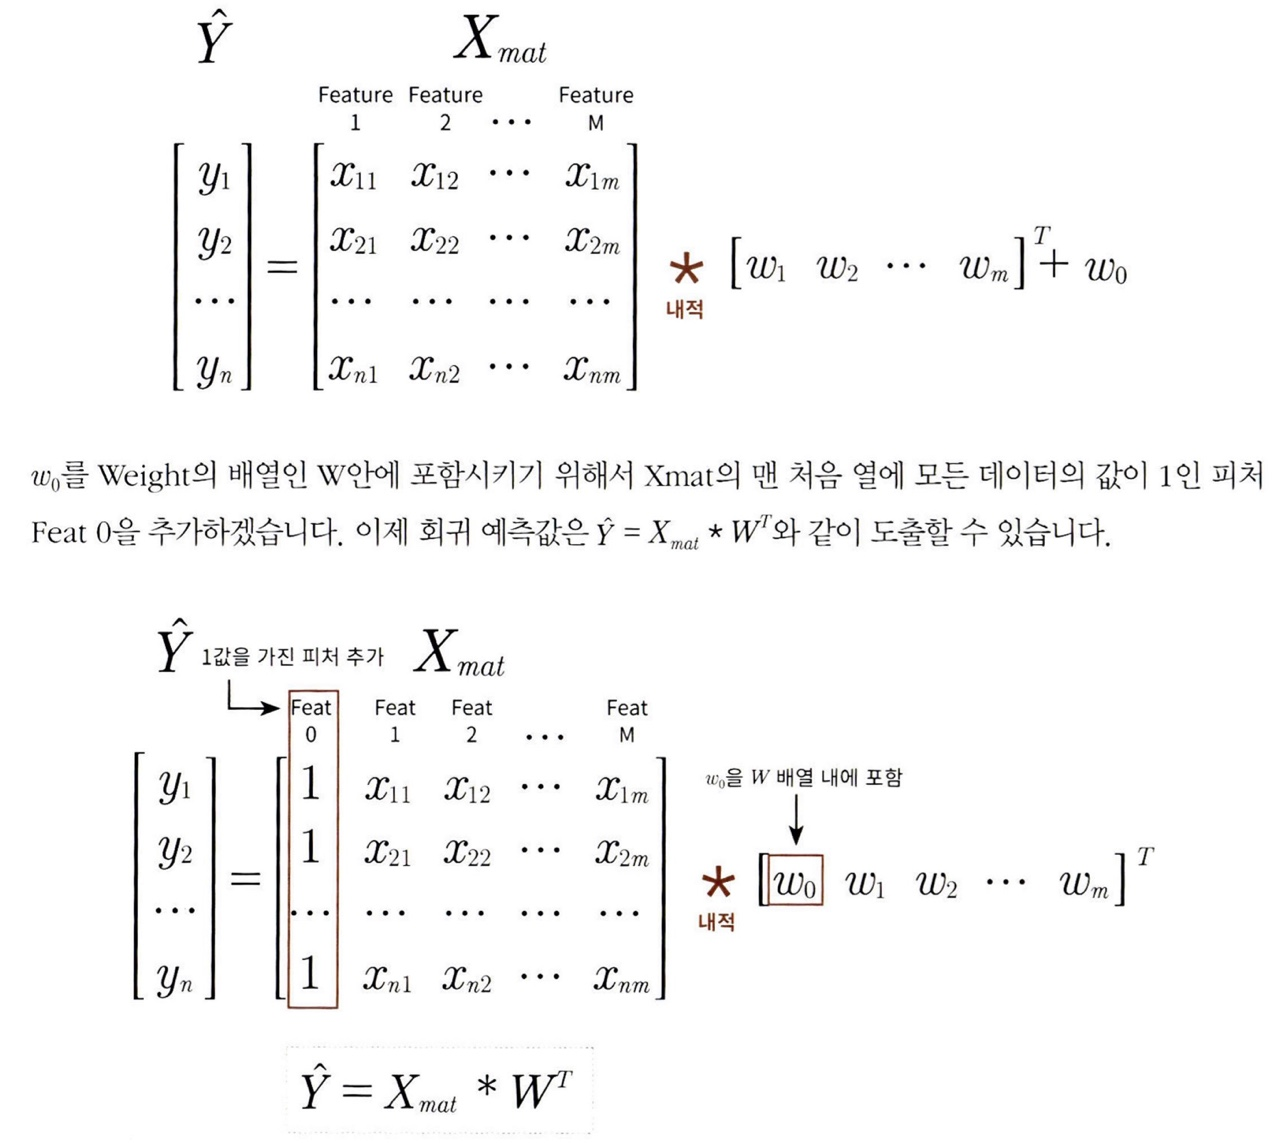

## 05 다항 회귀와 과(대)적합/과소적합 이해

### 다항 회귀 이해

- y = w0 + w1*x1 + w2*x2 + w3*x1*x2 + w4*x1^2 + w5*x2^2 와 같은 형태

- 선형 회귀 (회귀 계수가 선형)




In [9]:
# 단항값 [x1,x2]를 2차 다항값 [1,x1,x2,x1^2,x1x2,x2^2]로 변환

from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2*2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n',X)

# degree=2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n',poly_ftr)

# [x1=0, x2=1]은 [1,x1=0,x2=1,x1^2=0,x1x2=0,x2^2=1]로 변환

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [10]:
def polynomial_func(X):
  y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 # y = 1 + 2x1 + 3x1^2 + 4x2^3
  return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X)
y = polynomial_func(X)
print('삼차 다항식 결정값:\n',y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값:
 [  5 125]


In [11]:
from sklearn.linear_model import LinearRegression
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X) # 단항 계수 피처[x1,x2]를 3차 다항 계수[1,x1,x2,x1^2,x1x2,x2^2,x1^3,x1^2x2,x1x2^2,x2^3]으로 변환
print('3차 다항식 계수 feature:\n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n:',np.round(model.coef_,2))
print('Polynomial 회귀 Shape:',model.coef_.shape)

# PolyFeatures로 피처를 변환한 후 LinearRegression 클래스로 다항 회귀를 구현

3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
: [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape: (10,)


In [12]:
# 피처 변환과 선형 회귀 적용을 각각 별도로 하는 것보다 사이킷런의 Pipeline객체를 이용해 한 번에 다항 회귀를 구현하는 것이 코드가 더 명료

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
  y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

# Pipeline 객체로 Streamline하게 Polynomial Features 변환과 Linear Regression을 연결
model = Pipeline([('poly',PolynomialFeatures(degree=3)),('linear',LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)
print('Polynomial 회귀 계수\n',np.round(model.named_steps['linear'].coef_,2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항 회귀를 이용한 과소적합 및 과적합 이해

- 다항식의 차수가 높아질수록 매우 복잡한 피처 간의 관계까지 모델링이 가능하지만, 과적합의 문제가 크게 발생

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
  return np.cos(1.5*np.pi*X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples=30
X = np.sort(np.random.rand(n_samples))

# y값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값
y = true_fun(X) + np.random.randn(n_samples)*0.1


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.043208749872320706 입니다.

Degree 15 회귀 계수는 [-2.98291000e+03  1.03898770e+05 -1.87415056e+06  2.03715126e+07
 -1.44872551e+08  7.09311979e+08 -2.47064676e+09  6.24558367e+09
 -1.15676035e+10  1.56894317e+10 -1.54005437e+10  1.06456871e+10
 -4.91375763e+09  1.35919168e+09 -1.70380199e+08] 입니다.
Degree 15 MSE는 180526263.3177066 입니다.


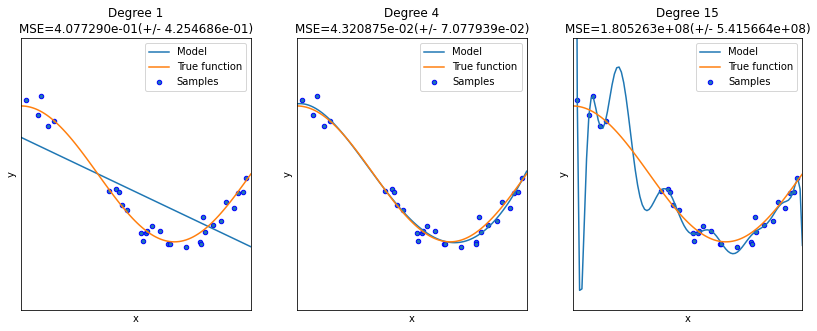

In [16]:
plt.figure(figsize=(14,5))
degrees=[1,4,15]
# 다항 회귀의 차수(degree)를 1,4,15로 각각 변경하면서 예측 결과 비교
for i in range(len(degrees)):
  ax = plt.subplot(1,len(degrees),i+1)
  plt.setp(ax,xticks=(),yticks=())

  # 개별 degree별로 Polynomial 변환
  polynomial_features = PolynomialFeatures(degree=degrees[i],include_bias=False) # include_bias: 절편 생성/ True인 경우 0차항(1)도 함께 만듬.
  linear_regression = LinearRegression()
  pipeline = Pipeline([('polynomial_features',polynomial_features),('linear_regression',linear_regression)])
  pipeline.fit(X.reshape(-1,1),y)

  # 교차 검증으로 다항 회귀를 평가
  scores = cross_val_score(pipeline, X.reshape(-1,1),y,scoring='neg_mean_squared_error',cv=10)
  
  # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
  coefficients = pipeline.named_steps['linear_regression'].coef_
  print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients,2)))
  print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i],-1*np.mean(scores)))

  # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행한다.
  # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
  X_test = np.linspace(0,1,100)
  # 예측값 곡선
  plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]),label='Model')
  # 실제값 곡선
  plt.plot(X_test, true_fun(X_test), '-', label='True function')
  plt.scatter(X,y,edgecolor='b',s=20, label='Samples')

  plt.xlabel('x'); plt.ylabel('y'); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc='best')
  plt.title('Degree {}\nMSE={:2e}(+/- {:2e})'.format(degrees[i], -scores.mean(), scores.std()))
plt.show()

- Degree 1 예측 곡선은 단순 선형 회귀와 동일. 실제 데이터 세트인 코사인 데이터 세트를 직선으로 예측하기에는 너무 단순함. 예측 곡선이 학습 데이터의 패턴을 제대로 반영하지 못하고 있는 과소적합 모델. MSE(Mean Squared Eroor)의 값은 약 0.407

- Degree 4 예측 곡선은 실제 데이터 세트와 유사. 변동하는 잡음까지 예측하지는 못했지만, 학습 데이터 세트를 비교적 잘 반영해 코사인 곡선 기반으로 테스트 데이터를 잘 예측한 곡선을 가진 모델. MSE값은 약 0.043으로 가장 뛰어난 예측 성능을 가짐.

- Degree 15 예측 곡선은 MSE값이 182815432인 오류 값. 예측 곡선을 보면 데이터 세트의 변동 잡음 값까지 지나치게 반영한 결과, 예측 곡선이 학습 데이터 세트만 정확히 예측하고, 테스트 값의 실제 곡선과는 완전히 다른 형태의 예측 곡선이 만들어짐. 결과적으로 학습 데이터에 너무 충실하게 맞춘 과적합이 심한 모델

-> 좋은 예측 모델은 학습 데이터의 패턴을 잘 반영하면서도 복잡하지 않은 균형 잡힌 (Balanced) 모델

### 편향 - 분산 트레이드오프(Bias - Variance Trade off)

- 편향이 높으면 분산이 낮아지고 (과소적합) 반대로 분산이 높으면 편향이 낮아짐. (과적합)

- 편향을 낮추고 분산을 높이면 전체 오류가 가장 낮아지는 '골디락스'지점을 통과하면서 분산을 지속적으로 높이면 전체 오류 값이 오히려 증가하면서 예측 성능이 다시 저하됨.

- 편향과 분산이 서로 트레이드오프를 이루면서 오류 Cost 값이 최대로 낮아지는 모델을 구축해야 함.



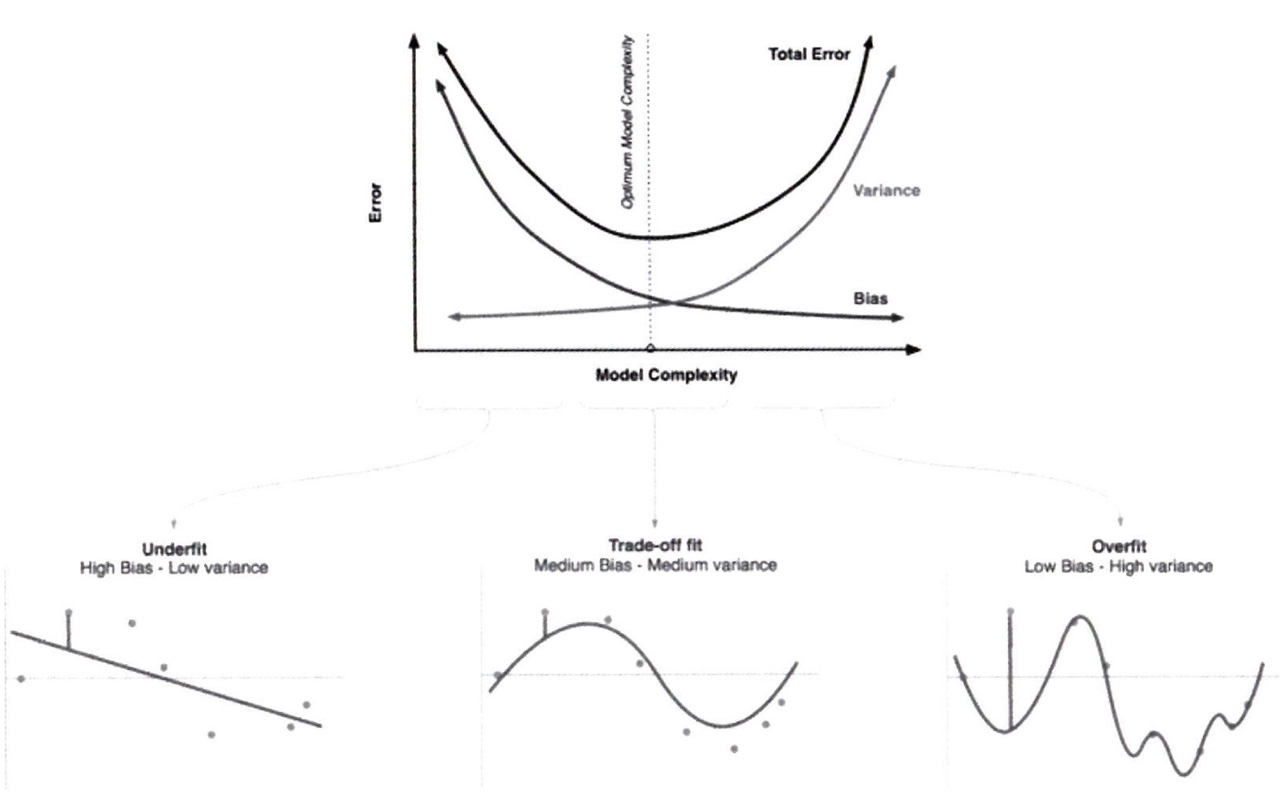